In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### directed acyclic graph + unique path and sequence

In [2]:
#Three rules for edge
#1. if a divide has two option, the edge will be labled option, energy will divide
#2. if it is a se action: step1 -> step2 -> step3, the node will have 1 degree(out)
#3. energy will fall to the leaves

#### graph from dict

In [78]:
test_goal_dict = {'goal': "You will become a researcher on multi-llm agent framework. You need to read paper/code of current state of art framework of multi-llm agents. Ultimately, I want you to be able to design and implement your own structure with useful difference compare to the existing structures",
'Step1':'**1.1:** Familiarize yourself with the basics of LLMs and multi-agent systems.\n- **1.2:** Identify and gather foundational papers and resources on LLMs.\n- **1.3:** Read through introductory materials to understand the core concepts and terminology.',
 'Step2': "**2.1:** Search for recent papers on multi-LLM agent frameworks using academic databases like Google Scholar, arXiv, and IEEE Xplore.\n- **2.2:** Create a document to summarize each paper's key points, contributions, and methodologies.\n- **2.3:** Identify the current state-of-the-art frameworks and their limitations.",
 'Step2.1': '**3.1:** Select a few state-of-the-art frameworks to study in-depth.\n- **3.2:** Read the selected papers thoroughly and take detailed notes.\n- **3.3:** Reach out to authors or experts if you have questions or need clarifications.',
 'Step2.2': '**4.1:** Find and download the code repositories of the selected frameworks (if available).\n- **4.2:** Set up a coding environment to run and experiment with the existing frameworks.\n- **4.3:** Replicate the results from the papers to ensure you understand the implementations.',
 'Step2.3': '**5.1:** Analyze the strengths and weaknesses of the current frameworks.\n- **5.2:** Brainstorm possible improvements or new features that could address the identified weaknesses.\n- **5.3:** Validate your ideas through discussions with peers or mentors.',
 'Step1.1': '**6.1:** Outline the architecture of your own multi-LLM agent framework.\n- **6.2:** Define the unique features and differences that your framework will have.\n- **6.3:** Create a detailed design document specifying the components and interactions within your framework.',
 'Step1.1.1': '**7.1:** Break down the implementation into smaller coding tasks.\n- **7.2:** Start coding the core components of your framework.\n- **7.3:** Regularly test each component to ensure functionality.',
 'Step1.1.2': '**8.1:** Integrate the components into a working prototype.\n- **8.2:** Conduct thorough testing to identify bugs and performance issues.\n- **8.3:** Refine and optimize your framework based on feedback and test results.',
 'Step1.1.2.1': "**9.1:** Write comprehensive documentation for your framework.\n- **9.2:** Prepare a research paper detailing your framework's design, implementation, and advantages over existing solutions.\n- **9.3:** Submit your work to academic journals or conferences and share it with the research community.",
 'Step1.1.2.2': '**10.1:** Present your work at seminars, workshops, or conferences to get feedback.\n- **10.2:** Collaborate with other researchers to further develop or integrate your framework.\n- **10.3:** Continuously update your knowledge and improve your framework based on the evolving landscape of multi-LLM agent research.\n\nRemember to pace yourself and tackle each step methodically. Good luck with your research journey!'}

test_edges_set = [('goal', 'step1', 2, 'option'), ('goal', 'step2', 1, 'option'),
                  ('step2', 'step2.1', 1, 'se'), ('step2.1', 'step2.2', 1, 'se'), ('step2.2', 'step2.3', 1, 'se'),
                  ('step1', 'step1.1', 1, 'se'), ('step1.1', 'step1.1.2', 2, 'option'), ('step1.1', 'step1.1.1', 1, 'option'), ('step1.1.2', 'step1.1.2.1', 1, 'se'), ('step1.1.2.1', 'step1.1.2.2', 1, 'se')]

In [79]:
G = nx.DiGraph()
#G.add_nodes_from(test_goal_dict)
for source, target, weight, label in test_edges_set:
    G.add_edge(source, target, weight=weight, label=label)


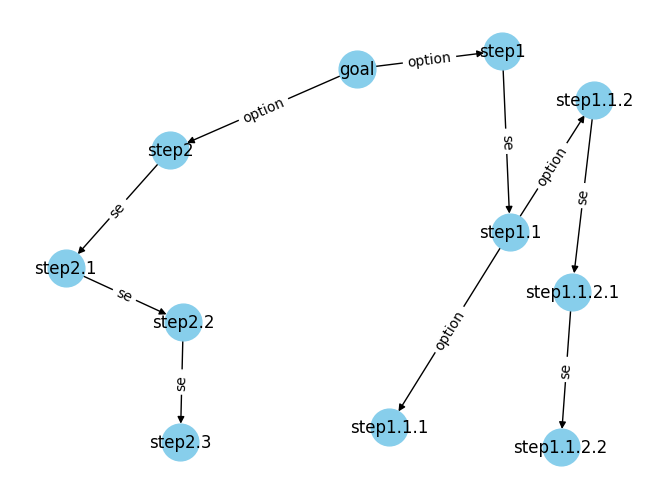

In [80]:
# Position nodes using the spring layout
pos = nx.spring_layout(G, k=0.5)

# Draw the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700)

# Draw the edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show the graph
plt.show()

#### mimic waterfall from goal

In [91]:
def distribute_energy(G, source, initial_energy):
    """
    Distribute energy from the source node to its successors evenly.
    G: NetworkX directed graph
    source: source node with initial energy
    initial_energy: energy of the source node
    """
    # Initialize all nodes with zero energy
    nx.set_node_attributes(G, 0, 'energy')
    
    # Set initial energy for the source node
    G.nodes[source]['energy'] = initial_energy
    
    # Create a queue to process nodes level by level
    queue = [source]
    
    while queue:
        current_node = queue.pop(0)
        successors = [(ele, G[current_node][ele]["weight"]) for ele in G.successors(current_node)]
        if successors:
            # Calculate energy distribution by weight
            weight_sum = sum(ele[1] for ele in successors)
            for successor, successor_weight in successors:
                # Update successor energy
                G.nodes[successor]['energy'] += G.nodes[current_node]['energy'] * successor_weight / weight_sum
                cc_energy = G.nodes[successor]['energy']
                print(f'the current successor is {successor}, the energy passed is {cc_energy}')
                
                # Add successor to queue for further processing
                queue.append(successor)
                #G.nodes[current_node]['energy'] = 0
    return None

In [92]:
distribute_energy(G, 'goal', 90)

the current successor is step1, the energy passed is 60.0
the current successor is step2, the energy passed is 30.0
the current successor is step1.1, the energy passed is 60.0
the current successor is step2.1, the energy passed is 30.0
the current successor is step1.1.2, the energy passed is 40.0
the current successor is step1.1.1, the energy passed is 20.0
the current successor is step2.2, the energy passed is 30.0
the current successor is step1.1.2.1, the energy passed is 40.0
the current successor is step2.3, the energy passed is 30.0
the current successor is step1.1.2.2, the energy passed is 40.0


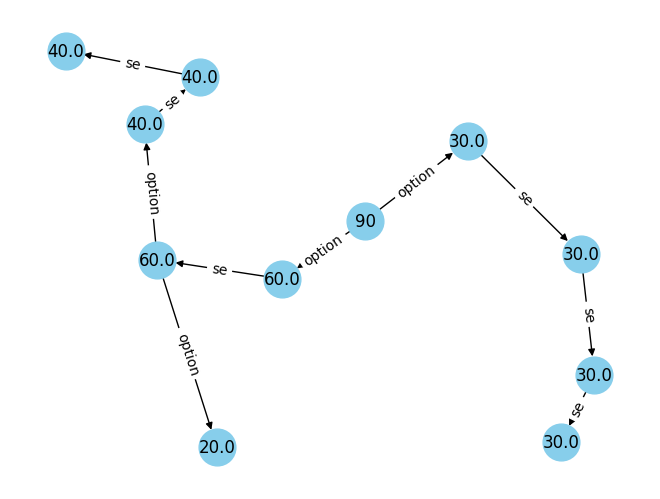

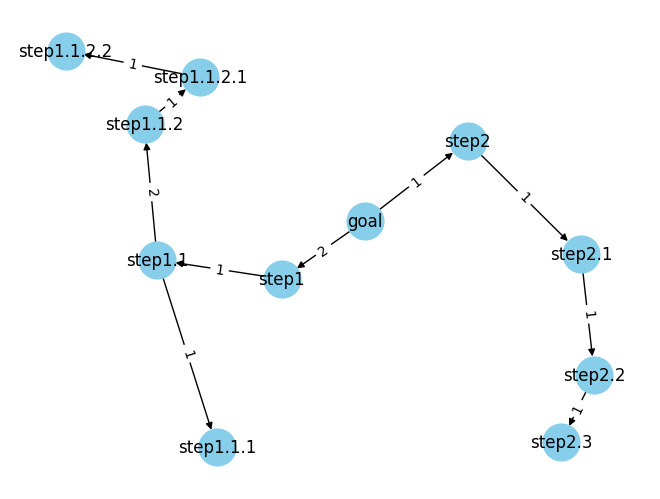

In [93]:
# Position nodes using the spring layout
pos = nx.spring_layout(G, k=0.5)
node_labels = {node: data['energy'] for node, data in G.nodes(data=True)}
label_pos = {key: [value[0] + 0.1, value[1]] for key, value in pos.items()}

# Draw the nodes
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=700)
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Draw the edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show the graph
plt.show()

# Position nodes using the spring layout
#pos = nx.spring_layout(G, k=0.5)

# Draw the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700)

# Draw the edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show the graph
plt.show()

### An example of energy switch using twitter bot as example

In [49]:
import random 
import sys
import os
sys.path.append("../../..")

from user_settings import *
from xyz.magics.agent.CoreAgent import CoreAgent



# set geneal momentum and sub-momentum
general_goal = "Be a better twitter content create and advertise for Netmind power platform, a decentralized training platform"
sub_momentum1 = "Write blog on twitter"
sub_momentum2 = "Learn about latest AI news and paper"
sub_momentum3 = "Improve twitter writing style"

# energy replenishment timer and amount
replen_1 = (100, 12)
replen_2 = (40, 24)
replen_3 = (50, 24)


# mimic feedback, with like, view, comment pair
feedbacks = [(30, 100, ['There seems to be potential for the business']), 
             (15, 121, ['The content seems duplicate with the previous one', 'there can be more detail of the implementation of decentralized training algorithm']),
             ]


In [48]:
# energy decay functions
def post_decay(post_content, time_consumed=0):
    "A mimic function for energy decay based on the length of post content and time consumed, representing the demandment for agent"
    return 20 + len(post_content) + time_consumed

def learning_decay(article):
    "A mimic function for energy decay when reading articles"
    return len(article)/10000

def practice_decay(readed_content, practice_time):
    "A mimic function for energy decay when practicing and improving writing style"
    return len(readed_content)/10000 + practice_time*10

# energy replenish function
def energy_replen(pattern, time):
    if time//pattern[1] == 0:
        return pattern[0]
    else:
        return 0

In [45]:
# writing post function
twitter_post_writing_prompt = {"system": """Please write a twitter post for {topic}.
There are some requirement to follow:{requirements}""",
"user": """
Take deep breath, dont hurry, you can now start writing:
"""}
twitter_post_writing_agent = CoreAgent(template=twitter_post_writing_prompt)
twitter_post_writing_agent.run(topic='cryptocurrency', requirements='promote netmind power platform, which uses itsown crypto to rent gpus')

'🚀 Harness the power of GPU rental with ease! 🌐 NetMind Power Platform is here to revolutionize the way you access computing power. Use our exclusive cryptocurrency to rent GPUs and supercharge your projects! 💻⚡️ No hassle, just pure efficiency. #NetMindPower #Crypto #GPUrental #BlockchainTech 🚀'

In [25]:
# paper grapping tool
import requests
from bs4 import BeautifulSoup, NavigableString


def get_new_papers():
    """function for getting latest paper name and link from paperswithcode website, number not specified yet, return from old-new
    """
    
    # URL of the Wikipedia page
    url = "https://paperswithcode.com/latest"
    prefix = "https://paperswithcode.com/"
    paper_list = []

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paper_blocks = soup.find_all('div', class_="row infinite-item item paper-card")
    for block in paper_blocks:
        title_block = block.find('h1')
        paper_title = title_block.text
        link = prefix + title_block.a['href']
        paper_list.append((paper_title, link))
    return list(reversed(paper_list))
        

In [26]:
get_new_papers()

[('COLD-Attack: Jailbreaking LLMs with Stealthiness and Controllability',
  'https://paperswithcode.com//paper/cold-attack-jailbreaking-llms-with'),
 ('A Distributional Analogue to the Successor Representation',
  'https://paperswithcode.com//paper/a-distributional-analogue-to-the-successor'),
 ('Vehicle Behavior Prediction by Episodic-Memory Implanted NDT',
  'https://paperswithcode.com//paper/vehicle-behavior-prediction-by-episodic'),
 ('Translating Images to Road Network:A Non-Autoregressive Sequence-to-Sequence Approach',
  'https://paperswithcode.com//paper/translating-images-to-road-network-a-non-1'),
 ('Plausible Extractive Rationalization through Semi-Supervised Entailment Signal',
  'https://paperswithcode.com//paper/plausible-extractive-rationalization-through'),
 ('Learning to Produce Semi-dense Correspondences for Visual Localization',
  'https://paperswithcode.com//paper/learning-to-produce-semi-dense'),
 ('Camera Calibration through Geometric Constraints from Rotation and

In [41]:
# mimic twitter writing learning
import random

def twitter_reading():
    "use random to mimic readed token and practice time"
    readed_token = random.randint(10000, 50000)
    practice_time = random.randint(0,2)
    return readed_token, practice_time
    

In [47]:
# action id dict
action_dict = {
    "action1": {'energy':0, 'action_name':'write post', 'decay_function': post_decay, 'action': twitter_post_writing_agent.run(topic='cryptocurrency', requirements='promote netmind power platform, which uses itsown crypto to rent gpus'), 'energy_pattern': replen_1},
    "action2": {'energy':0, 'action_name':'learn new articles', 'decay_function': learning_decay, 'action':get_new_papers, 'energy_pattern': replen_2},
    "action3": {'energy':0, 'action_name':'learn twitter writing', 'decay_function': practice_decay, 'action': twitter_reading, 'energy_pattern': replen_3}
}

In [51]:
# loop for the cycle with energy
loop_time = 0

while loop_time < 50: 
    # decide if energy replenishment
    for key, inner_dict in action_dict.items():
        inner_dict['energy'] += energy_replen(inner_dict['energy_pattern'], loop_time)
    
    # choose action base on energy
    action_with_highest_energy = max(action_dict, key=lambda k:action_dict[k]['energy'])
    print(action_dict[action_with_highest_energy]['action_name'])
    
    #energy decay for that action
    
    
    # increase time
    loop_time +=1

write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
write post
